# Introduction / Name of Capstone Project

A proper introduction gives visitors the context needed to understand the project. This is also where you should introduce the dataset and explain the challenge you're solving.
- What is the main challenge or topic your project addresses?
- Which dataset are you using and how did you acquire it? (Also summarize the types of features and variables available in the dataset.)
- What are the most important findings from your project? (Preview your results and draw visitors in.)
- How does your project address the challenge? (Which data science and machine learning techniques do you use?)
- Who are you and why is this project important or valuable to you? (What is your motivation for doing this project?)

## Library Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Load data
applications_history_data = pd.read_csv('data/applications_history.csv')
bki_data = pd.read_csv('data/bki.csv')
client_profile_data = pd.read_csv('data/client_profile.csv')
payments_data = pd.read_csv('data/payments.csv')
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

In [3]:
print(applications_history_data.columns)
print(bki_data.columns)
print(client_profile_data.columns)
print(payments_data.columns)
print(test_data.columns)
print(train_data.columns)

Index(['PREV_APPLICATION_NUMBER', 'APPLICATION_NUMBER', 'NAME_CONTRACT_TYPE',
       'AMOUNT_ANNUITY', 'AMT_APPLICATION', 'AMOUNT_CREDIT', 'AMOUNT_PAYMENT',
       'AMOUNT_GOODS_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
Index(['APPLICATION_NUMBER', 'BUREAU_ID', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'A

## Exploratory Analysis

Basic Information:
- How many observations and features does your dataset have?
- Do you understand each feature intuitively?
- Do the values for each feature make sense? Are they on the right scale?
- Do you anticipate issues with missing data?
- Were your features read in as the correct datatype?

Distributions:
- Do each of the distributions make intuitive sense to you?
- Do you anticipate any issues with outliers or sparse data?
- Are there any surprising distributions you should take a closer look at?
- Do the summary statistics confirm what you’ve seen from the charts?

Feature Relationships (Segmentations & Correlations):
- Have you segmented key categorical features and/or the target variable?
- What have you learned about the relationships between your features?
- Are there any surprising correlations (or non-correlations)?
- Have you visualized your correlation matrix for easier reference?
- Do you anticipate any helpful new features to engineer?

### Basic Information

In [4]:
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")   
print(f"Client Profile shape: {client_profile_data.shape}")

Train shape: (110093, 3)
Test shape: (165141, 2)
Client Profile shape: (250000, 24)


In [5]:
df_train = pd.merge(train_data, client_profile_data, how='left', on='APPLICATION_NUMBER')
df_test = pd.merge(test_data, client_profile_data, how='left', on='APPLICATION_NUMBER')

In [6]:
print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")  

Train shape: (110093, 26)
Test shape: (165141, 25)


In [7]:
df_train.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,0,Cash,M,1.00,157500.00,855000.00,25128.00,Secondary / secondary special,Married,...,3.00,0.70,0.65,0.72,0.00,0.00,1.00,0.00,0.00,2.00
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123526683,0,Cash,F,0.00,135000.00,1006920.00,42660.00,Higher education,Married,...,2.00,NaN,0.68,0.27,0.00,0.00,0.00,7.00,0.00,4.00
3,123710391,1,Cash,M,0.00,180000.00,518562.00,22972.50,Secondary / secondary special,Married,...,2.00,NaN,0.17,0.17,0.00,0.00,0.00,0.00,0.00,0.00
4,123590329,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_train.tail()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
110088,123458312,0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110089,123672463,0,Cash,F,0.00,175500.00,269550.00,12618.00,Secondary / secondary special,Married,...,2.00,0.53,0.47,0.58,0.00,0.00,0.00,0.00,0.00,2.00
110090,123723001,0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110091,123554358,0,Cash,F,2.00,270000.00,1024740.00,49428.00,Incomplete higher,Married,...,4.00,0.65,0.65,0.56,0.00,0.00,0.00,1.00,0.00,1.00
110092,123676265,0,Credit Card,F,1.00,112500.00,337500.00,16875.00,Secondary / secondary special,Married,...,3.00,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_train.describe()

,APPLICATION_NUMBER,TARGET,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,110093.00,110093.00,89539.00,89539.00,89539.00,89534.00,89539.00,89539.00,89539.00,30533.00,...,89538.00,39091.00,89345.00,71808.00,77480.00,77480.00,77480.00,77480.00,77480.00,77480.00
mean,123577236.83,0.08,0.42,168322.99,599749.52,27119.66,0.02,16029.82,67260.61,12.10,...,2.16,0.50,0.51,0.51,0.01,0.01,0.03,0.27,0.27,1.90
std,88809.39,0.27,0.73,99622.78,403169.42,14503.02,0.01,4355.46,139057.16,11.93,...,0.92,0.21,0.19,0.20,0.08,0.11,0.21,0.91,0.61,1.88
min,123423341.00,0.00,0.00,25650.00,45000.00,1615.50,0.00,7679.00,2.00,0.00,...,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,123500494.00,0.00,0.00,112500.00,270000.00,16524.00,0.01,12433.00,927.00,5.00,...,2.00,0.33,0.39,0.37,0.00,0.00,0.00,0.00,0.00,0.00
50%,123576941.00,0.00,0.00,148500.00,517788.00,24903.00,0.02,15728.00,2206.00,9.00,...,2.00,0.50,0.57,0.54,0.00,0.00,0.00,0.00,0.00,1.00
75%,123653870.00,0.00,1.00,202500.00,808650.00,34596.00,0.03,19668.00,5660.50,15.00,...,3.00,0.67,0.66,0.67,0.00,0.00,0.00,0.00,0.00,3.00
max,123730843.00,1.00,19.00,4500000.00,4050000.00,225000.00,0.07,25196.00,365243.00,65.00,...,20.00,0.95,0.85,0.90,3.00,9.00,8.00,27.00,8.00,25.00


In [10]:
df_train.describe(include=['object'])

,NAME_CONTRACT_TYPE,GENDER,EDUCATION_LEVEL,FAMILY_STATUS
count,110093,89539,89539,89539
unique,2,3,5,6
top,Cash,F,Secondary / secondary special,Married
freq,99551,59077,63506,57236


In [11]:
df_train.dtypes

APPLICATION_NUMBER              int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
GENDER                         object
CHILDRENS                     float64
TOTAL_SALARY                  float64
AMOUNT_CREDIT                 float64
AMOUNT_ANNUITY                float64
EDUCATION_LEVEL                object
FAMILY_STATUS                  object
REGION_POPULATION             float64
AGE                           float64
DAYS_ON_LAST_JOB              float64
OWN_CAR_AGE                   float64
FLAG_PHONE                    float64
FLAG_EMAIL                    float64
FAMILY_SIZE                   float64
EXTERNAL_SCORING_RATING_1     float64
EXTERNAL_SCORING_RATING_2     float64
EXTERNAL_SCORING_RATING_3     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: objec

In [12]:
df_train.isna().sum()

APPLICATION_NUMBER                0
TARGET                            0
NAME_CONTRACT_TYPE                0
GENDER                        20554
CHILDRENS                     20554
TOTAL_SALARY                  20554
AMOUNT_CREDIT                 20554
AMOUNT_ANNUITY                20559
EDUCATION_LEVEL               20554
FAMILY_STATUS                 20554
REGION_POPULATION             20554
AGE                           20554
DAYS_ON_LAST_JOB              20554
OWN_CAR_AGE                   79560
FLAG_PHONE                    20554
FLAG_EMAIL                    20554
FAMILY_SIZE                   20555
EXTERNAL_SCORING_RATING_1     71002
EXTERNAL_SCORING_RATING_2     20748
EXTERNAL_SCORING_RATING_3     38285
AMT_REQ_CREDIT_BUREAU_HOUR    32613
AMT_REQ_CREDIT_BUREAU_DAY     32613
AMT_REQ_CREDIT_BUREAU_WEEK    32613
AMT_REQ_CREDIT_BUREAU_MON     32613
AMT_REQ_CREDIT_BUREAU_QRT     32613
AMT_REQ_CREDIT_BUREAU_YEAR    32613
dtype: int64

<AxesSubplot:>

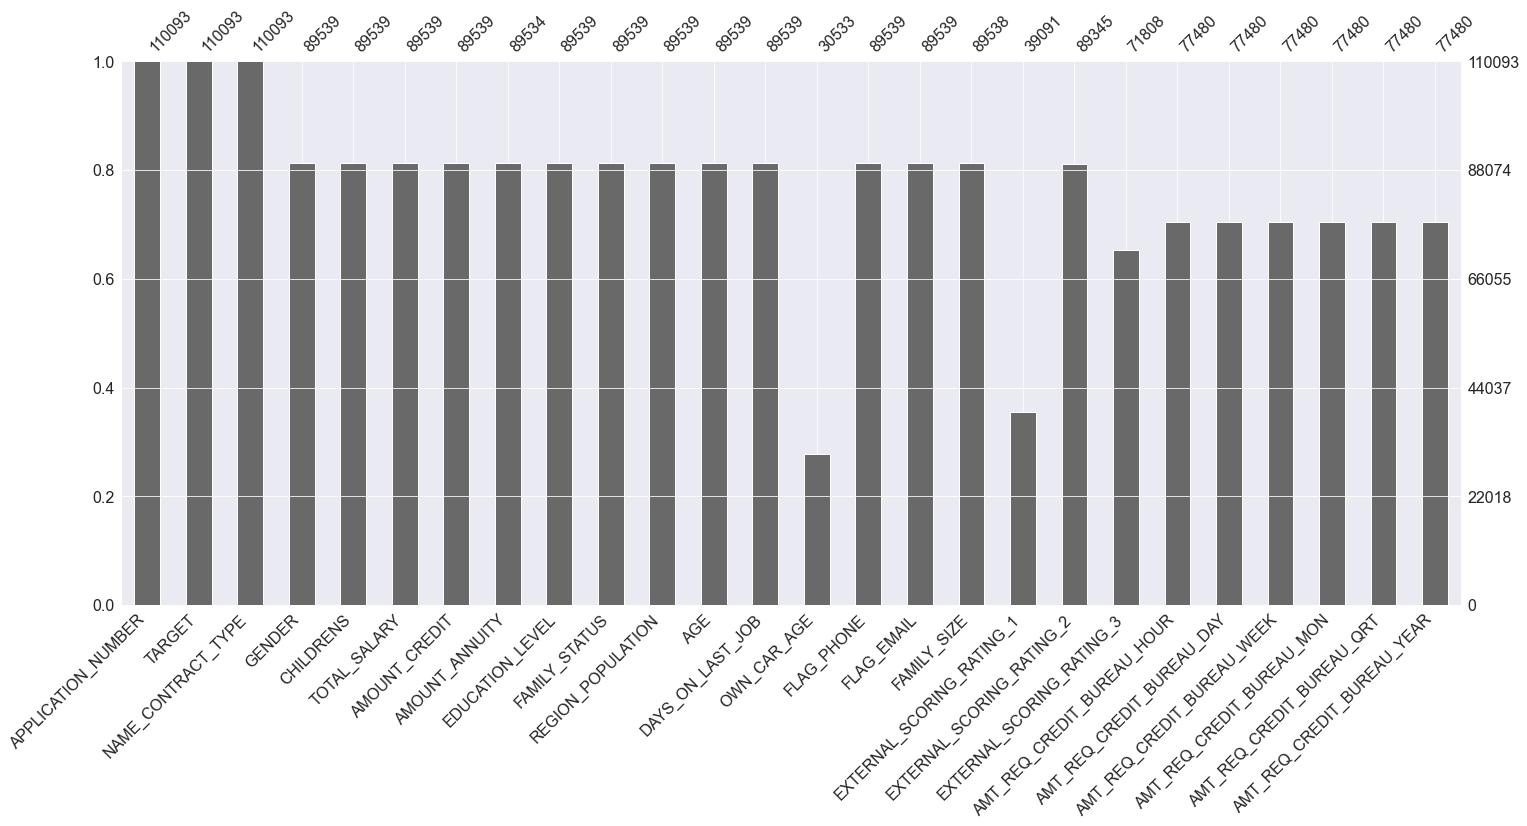

In [89]:
msno.bar(df_train)

**OBSERVATION**: 
- Train/Test and Client Profile datasets can be merged on 'APPLICATION_NUMBER' column 
- After merging Train/Test and Client Profile datasets, we have 26 features where 22 are numeric and 4 are categorical
- Some observations don't have profile data
- OWN_CAR_AGE and EXTERNAL_SCORING_RATING_1 has more than 60% of missing data
- AGE and OWN_CAR_AGE are saved in days
- Categorical columns have max unique values from 2 to 6
- Target is imbalanced
- Childrens and Family Size might be a categorical feature
- Total salary might have outliers
- We might have to normalize data as different features are having different scales

### Distributions

In [13]:
features = df_train.drop(columns=['TARGET'])
target = df_train['TARGET']
features.shape

(110093, 25)

#### Target Disctibution

In [167]:
target.value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

Text(0, 0.5, 'Index')

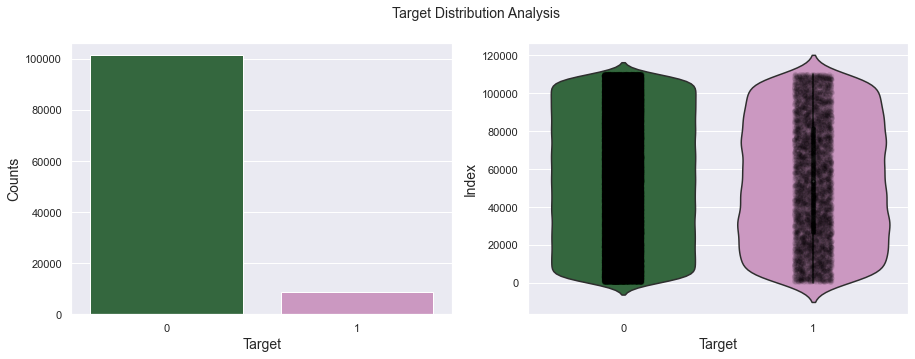

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Target Distribution Analysis", size=14)

sns.countplot(target, ax=axes[0], palette="cubehelix")
sns.violinplot(target, df_train.index, ax=axes[1], palette="cubehelix")
sns.stripplot(target, df_train.index, jitter=True, ax=axes[1], color="black", alpha=0.05)

axes[0].set_xlabel("Target", fontsize=14)
axes[0].set_ylabel("Counts", fontsize=14)
axes[1].set_xlabel("Target", fontsize=14)
axes[1].set_ylabel("Index", fontsize=14)

**OBSERVATION**:
- We are having imbalanced target which is expected as we are trying to discover a problem clients
- Even though TARGET is imbalanced, it has a normal distribution among observations

#### Features distribution

In [16]:
numerical_features = features.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 21


Index(['APPLICATION_NUMBER', 'CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT',
       'AMOUNT_ANNUITY', 'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB',
       'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE',
       'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2',
       'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [17]:
f_nunique = numerical_features.apply(lambda features: features.nunique(dropna=False))
f_nunique_col = f_nunique.index.tolist()
f_nunique

APPLICATION_NUMBER            110093
CHILDRENS                         14
TOTAL_SALARY                    1063
AMOUNT_CREDIT                   4018
AMOUNT_ANNUITY                 10543
REGION_POPULATION                 81
AGE                            16865
DAYS_ON_LAST_JOB                9553
OWN_CAR_AGE                       55
FLAG_PHONE                         3
FLAG_EMAIL                         3
FAMILY_SIZE                       16
EXTERNAL_SCORING_RATING_1      37239
EXTERNAL_SCORING_RATING_2      60877
EXTERNAL_SCORING_RATING_3        762
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         22
AMT_REQ_CREDIT_BUREAU_QRT         10
AMT_REQ_CREDIT_BUREAU_YEAR        22
dtype: int64

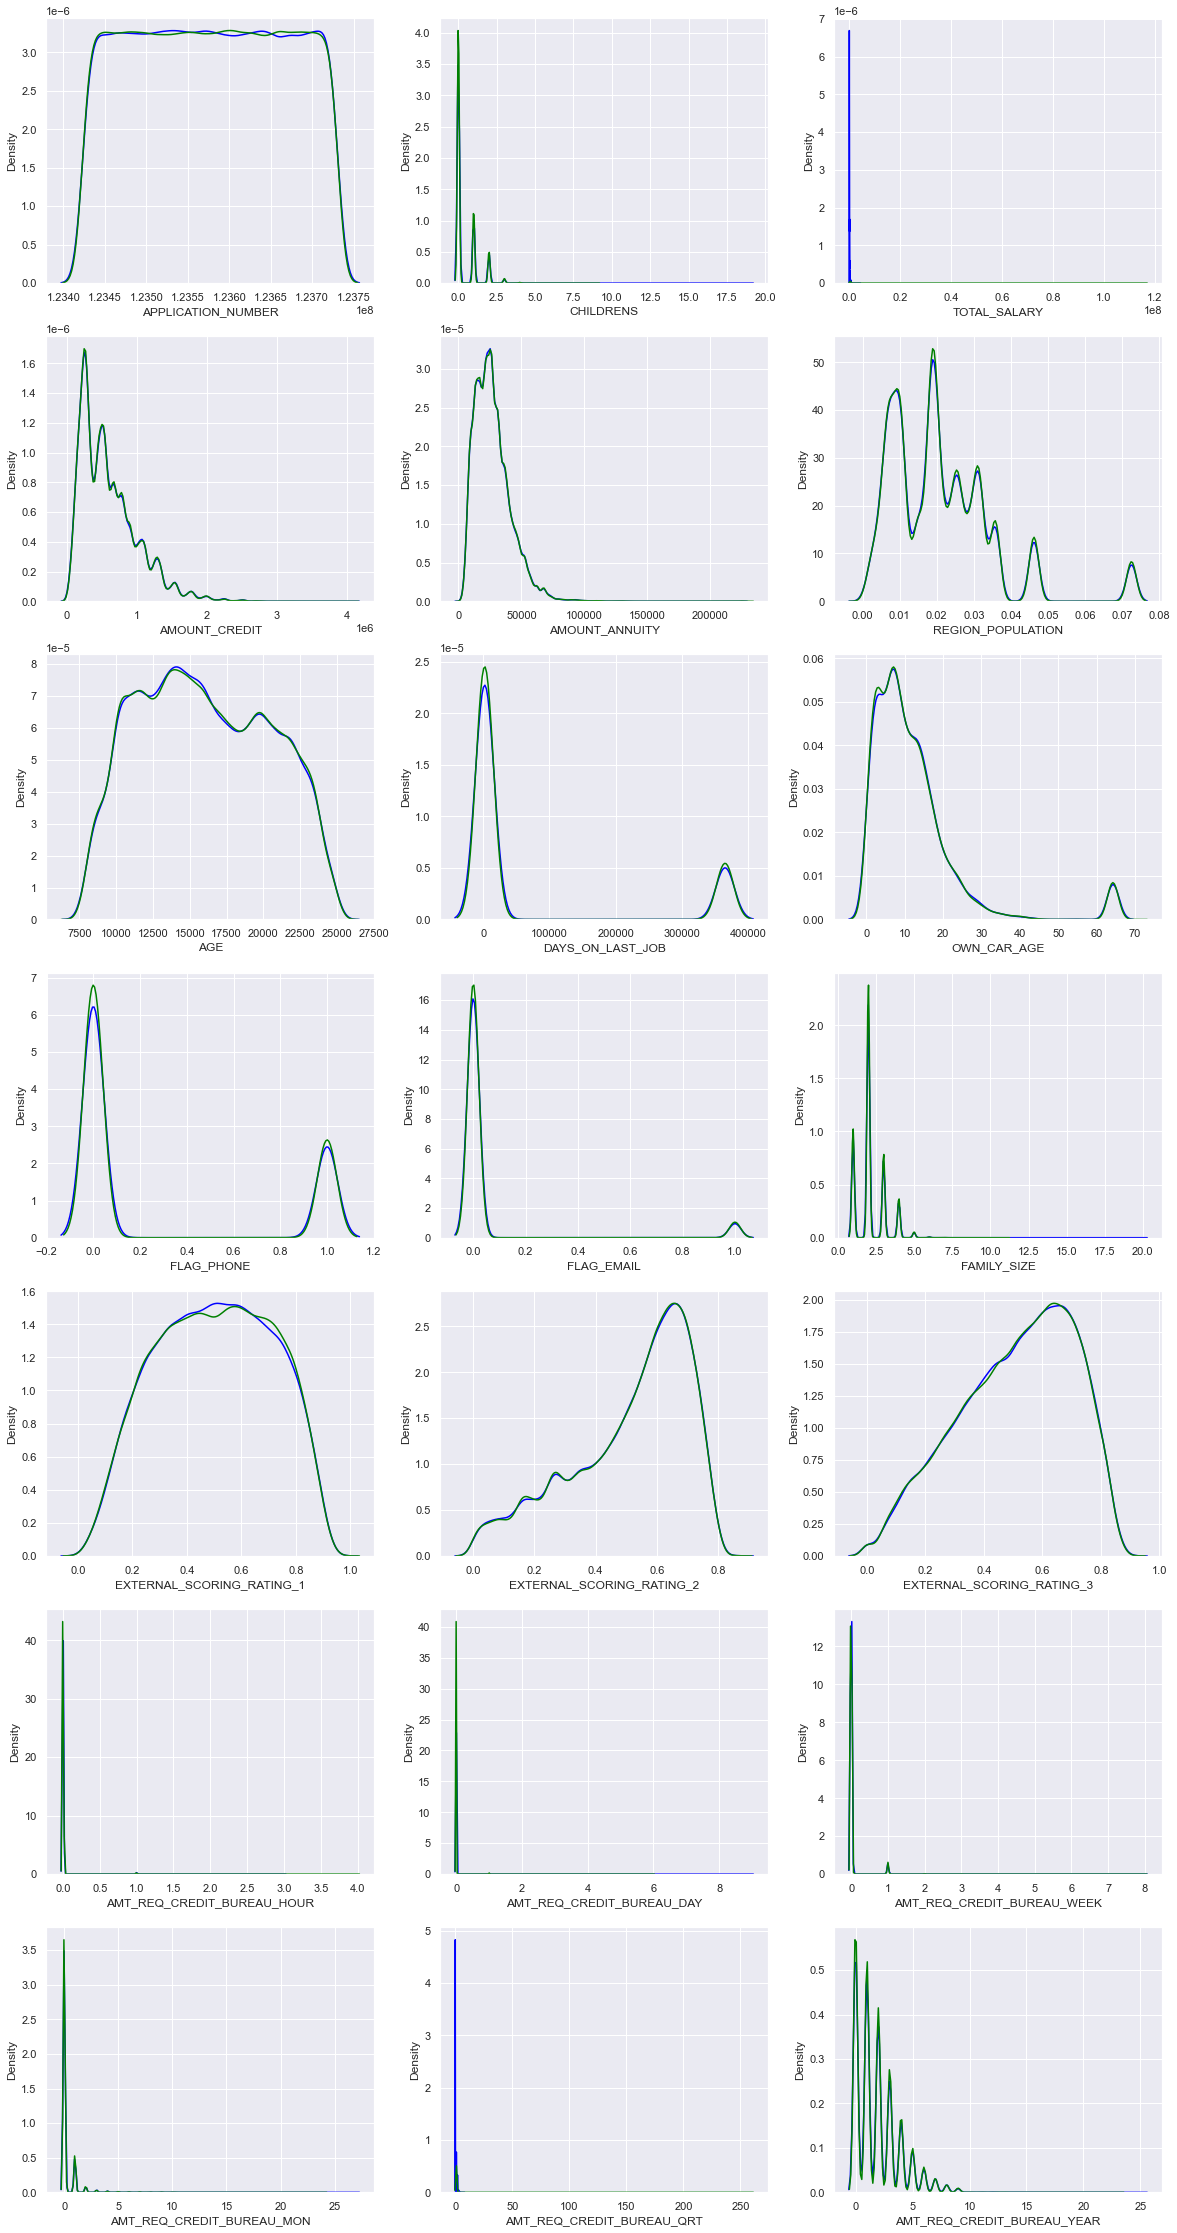

In [172]:
fig, axes = plt.subplots(7, 3, figsize=(20, 40))

for num, feature in enumerate(numerical_features.columns):
    try:
        train_data, test_data = df_train[feature].copy(), df_test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//3, num%3], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = df_train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")

**OBSERVATION**:
- We have 21 features which are numeric
- We have 10 numeric features with values less than 25 which can be treated as categorical/discrete features
- Test and Train have similar distribution. It's a good sign for a future prediction

##### Descrete features

In [18]:
discrete_f_col = f_nunique[f_nunique<=25].index
print(f'Descrete features (25 or less unique values) :')
print(f'Count: {len(discrete_f_col)}')
print(f'List: {discrete_f_col}')

Descrete features (25 or less unique values) :
Count: 10
List: Index(['CHILDRENS', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


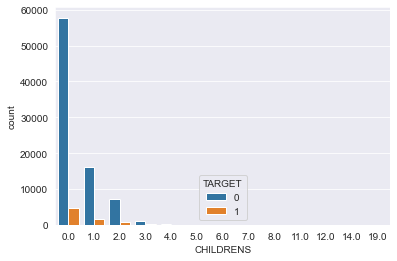

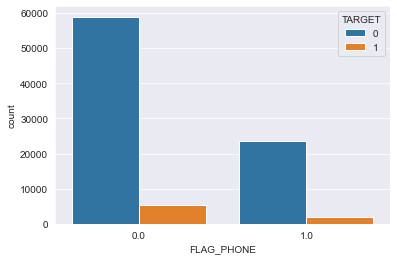

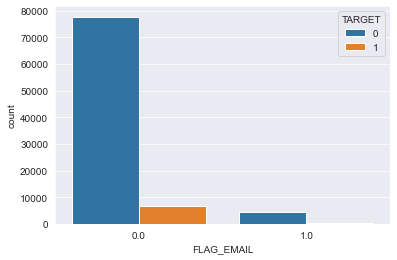

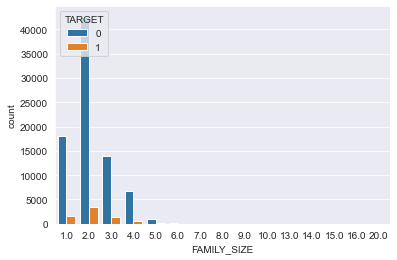

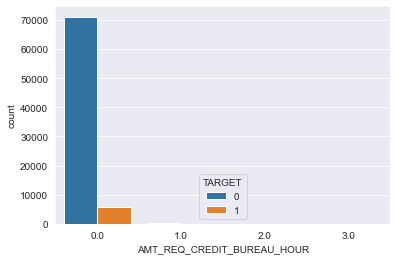

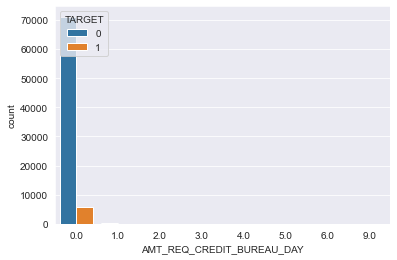

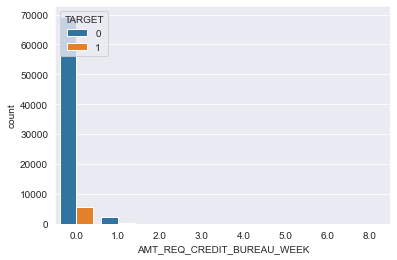

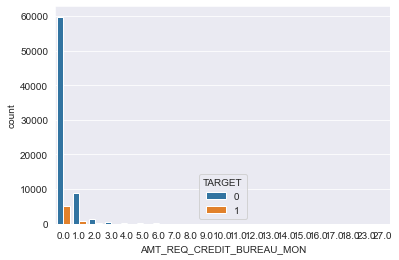

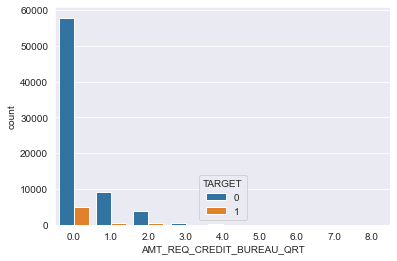

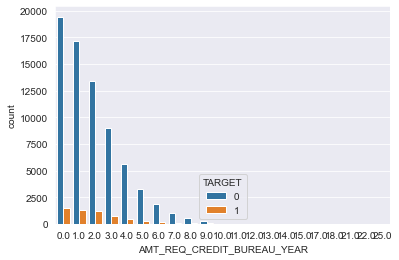

In [19]:
for feature in discrete_f_col:
    sns.countplot(x =feature, hue = "TARGET", data = df_train)
    plt.show()

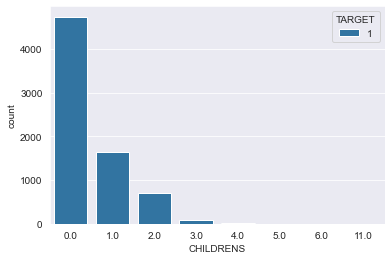

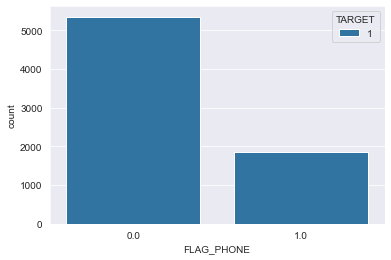

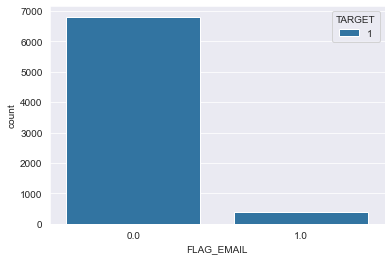

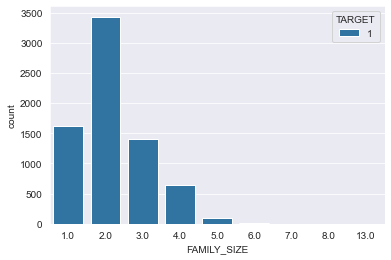

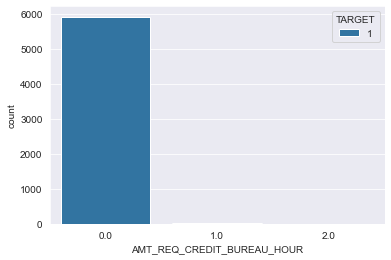

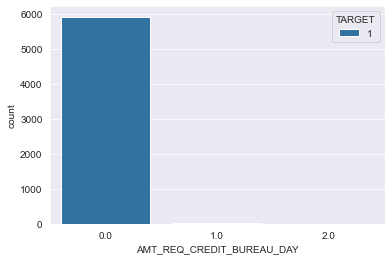

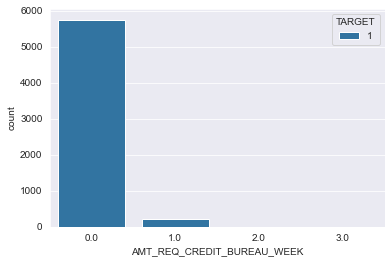

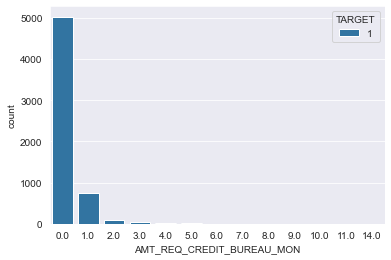

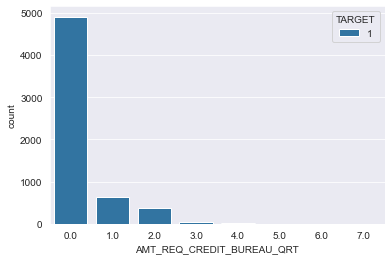

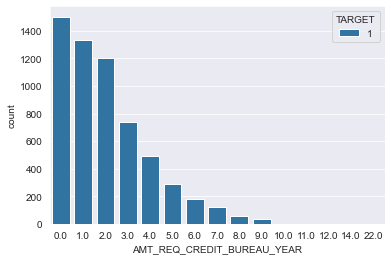

In [20]:
for feature in discrete_f_col:
    sns.countplot(x =feature, hue = "TARGET", data = df_train[df_train['TARGET']==1])
    plt.show()

**OBSERVATION**:
- CHILDRENS feature have some sparsed values after 5 and can be combined
- FAMILY_SIZE feature have some sparsed values after 7 and can be combined
- AMT_REQ_CREDIT_BUREAU_HOUR feature have some sparsed values after 2 and can be combined
- AMT_REQ_CREDIT_BUREAU_DAY feature have some sparsed values after 2 and can be combined
- AMT_REQ_CREDIT_BUREAU_WEEK feature have some sparsed values after 2 and can be combined
- AMT_REQ_CREDIT_BUREAU_MON feature have some sparsed values after 6 and can be combined
- AMT_REQ_CREDIT_BUREAU_QRT feature have some sparsed values after 5 and can be combined
- AMT_REQ_CREDIT_BUREAU_YEAR feature have some sparsed values after 10 and can be combined

##### Continuous Feature

In [21]:
continuous_f_col = f_nunique[f_nunique>25].index
print(f'Continuous features (more than 25 unique values) :')
print(f'Count: {len(continuous_f_col)}')
print(f'List: {continuous_f_col}')

Continuous features (more than 25 unique values) :
Count: 11
List: Index(['APPLICATION_NUMBER', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE',
       'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2',
       'EXTERNAL_SCORING_RATING_3'],
      dtype='object')


In [60]:
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

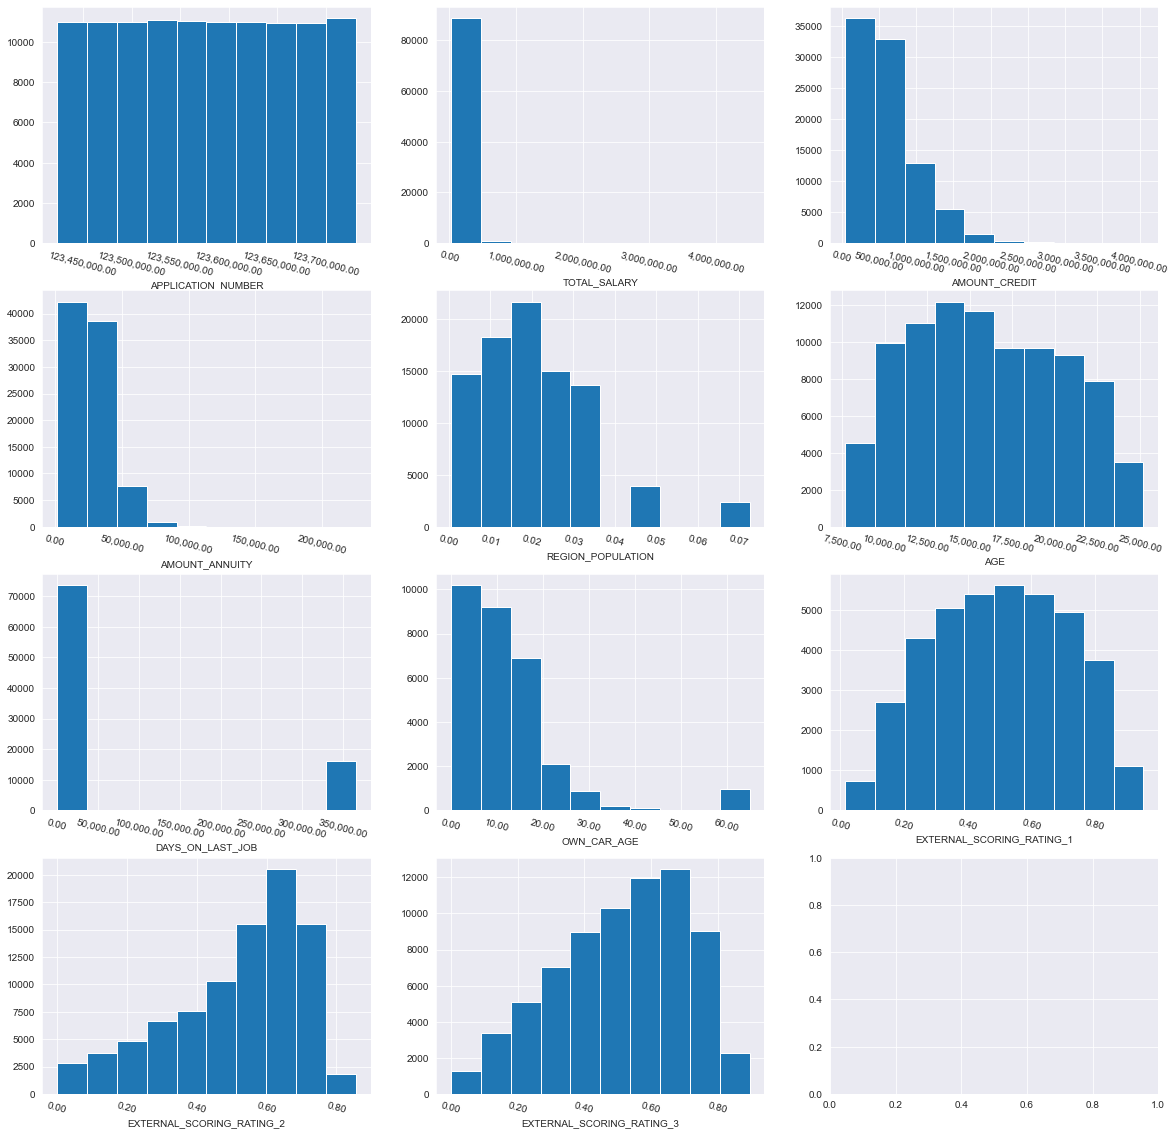

In [75]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for num, feature in enumerate(continuous_f_col):
    data = df_train[feature].copy()
    axes[num//3, num%3].hist(data, bins=10)
    axes[num//3, num%3].set_xticklabels( axes[num//3, num%3].get_xticks(), rotation = -15)
    axes[num//3, num%3].set_xlabel(feature, fontsize=10)
    axes[num//3, num%3].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

**OBSERVATION**:
- We have 11 Continuous features
- DAYS_ON_LAST_JOB have a strange value 350000 which is more than 950 years, might be used as a value for a missing data
- TOTAL_SALARY might have some potential outliers as most of the data is 1000000 or less
- AMOUNT_CREDIT might have some potential outliers as most of the data is 3000000 or less
- AMOUNT_ANNUITY might have some potential outliers as most of the data is 100000 or less

##### Features correlation

Text(0, 0.5, 'Density')

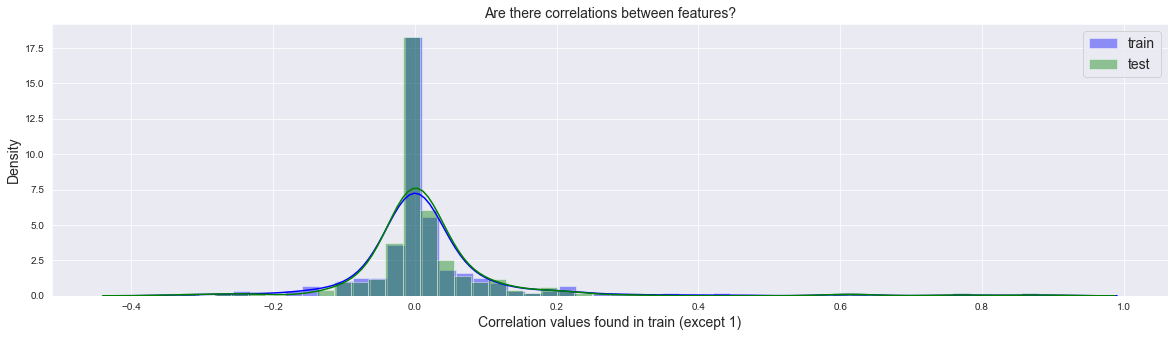

In [99]:
train_correlations = df_train.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = df_train.columns.tolist()
columns.remove("TARGET")

test_correlations = df_test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

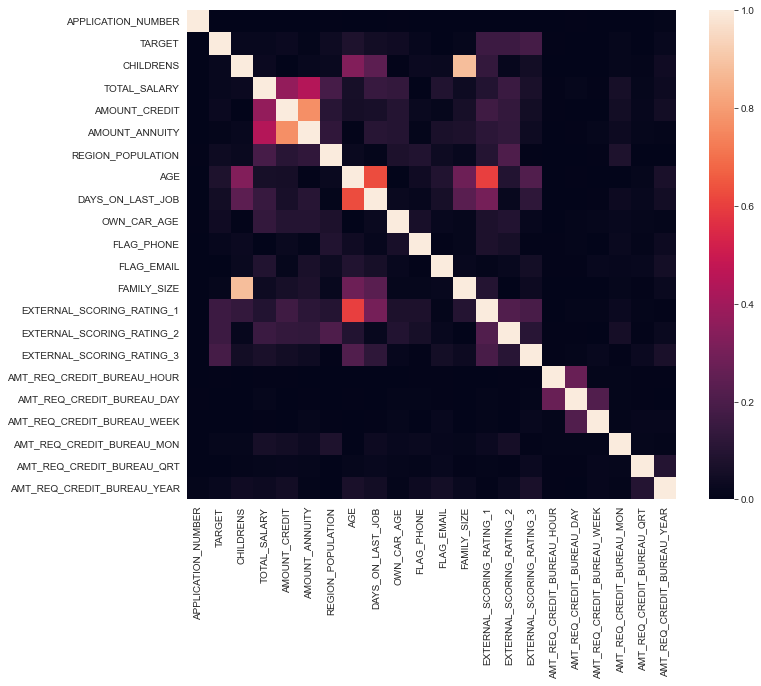

In [121]:
#correlation matrix
corr_matrix = df_train.corr().abs().round(3)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, square=True);

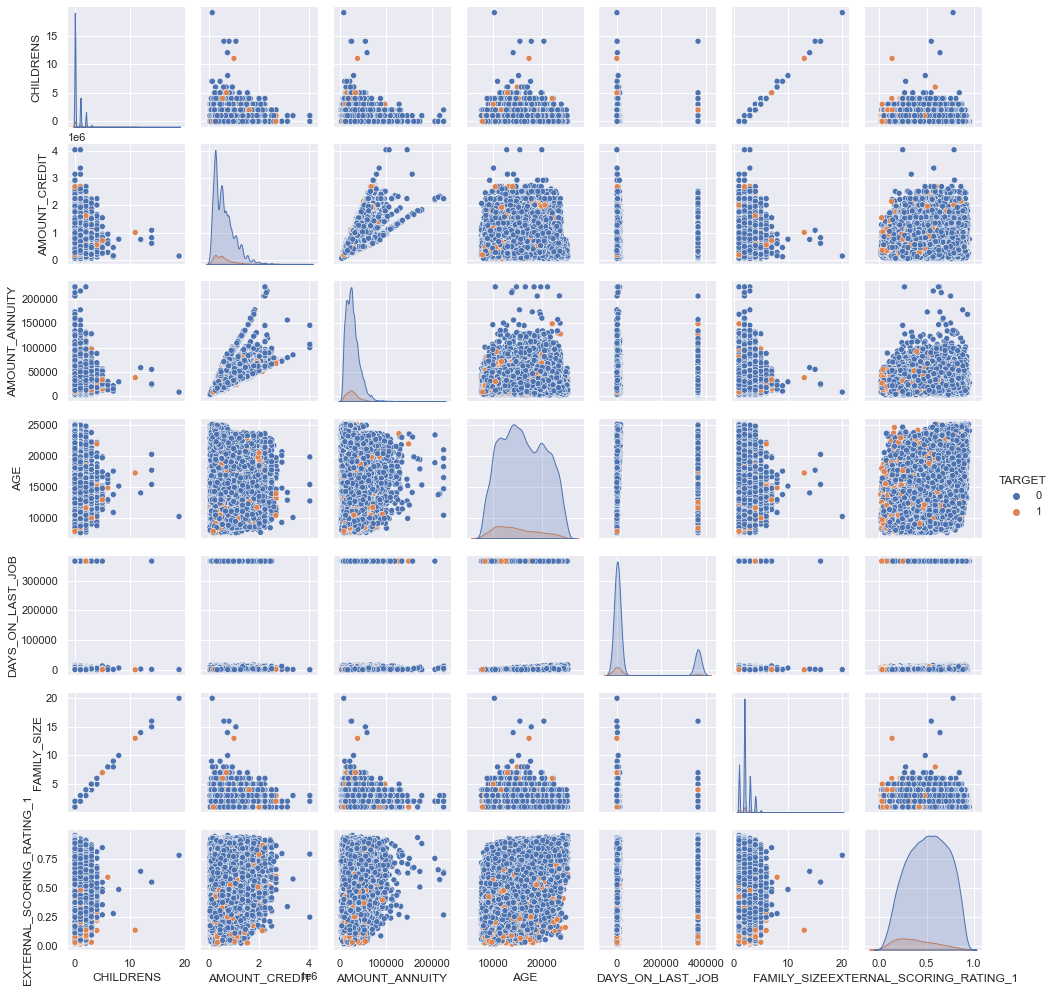

In [186]:
columns = ['CHILDRENS', 'AMOUNT_CREDIT','AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB','FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'TARGET']
sns.pairplot(df_train[columns], hue = 'TARGET', size=2, kind="scatter", diag_kind="kde")

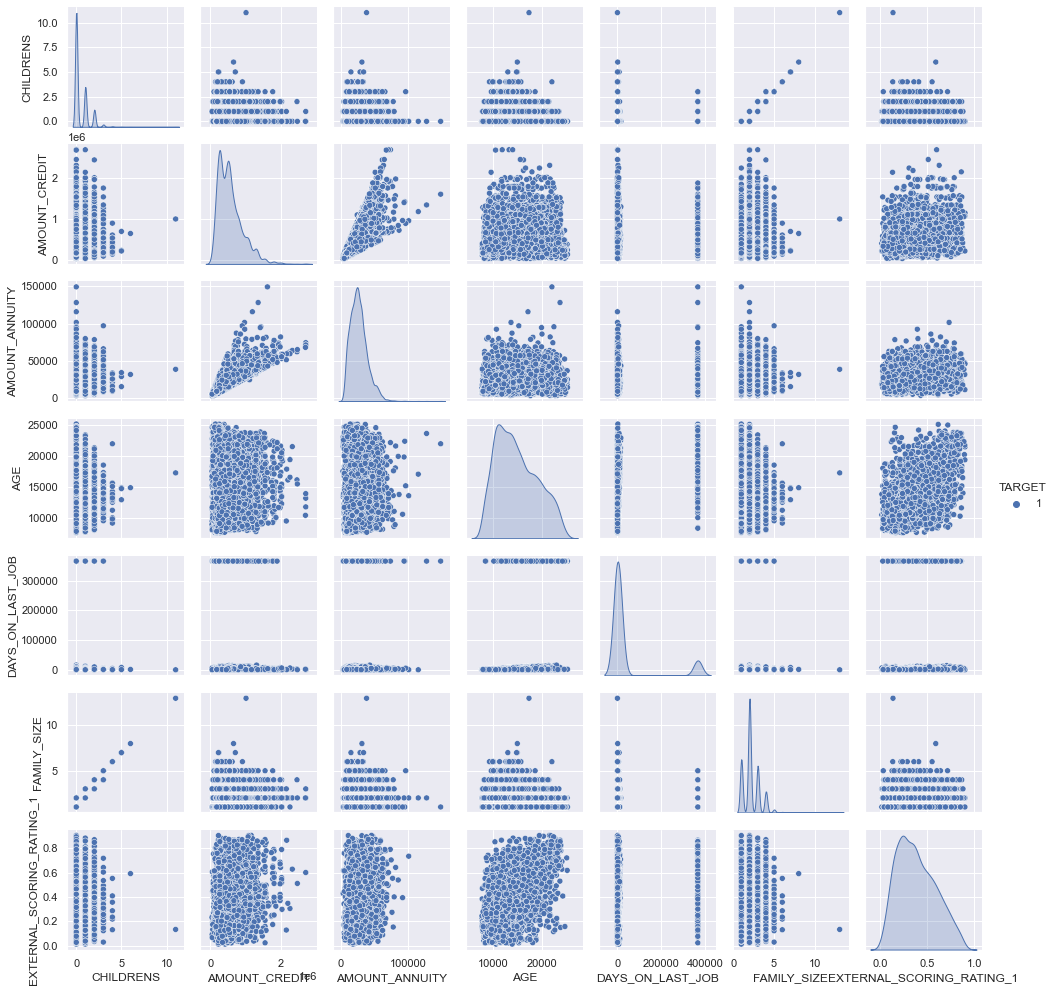

In [187]:
sns.pairplot(df_train[df_train['TARGET']==1][columns], hue = 'TARGET', size=2, kind="scatter", diag_kind="kde")

In [106]:
corr_with_target = corr_matrix["TARGET"].sort_values(ascending = False)
corr_with_target

TARGET                       1.00
EXTERNAL_SCORING_RATING_3    0.18
EXTERNAL_SCORING_RATING_2    0.16
EXTERNAL_SCORING_RATING_1    0.16
AGE                          0.08
DAYS_ON_LAST_JOB             0.05
OWN_CAR_AGE                  0.04
REGION_POPULATION            0.04
AMOUNT_CREDIT                0.03
CHILDRENS                    0.02
TOTAL_SALARY                 0.02
AMT_REQ_CREDIT_BUREAU_YEAR   0.02
FLAG_PHONE                   0.02
FAMILY_SIZE                  0.01
AMT_REQ_CREDIT_BUREAU_MON    0.01
AMOUNT_ANNUITY               0.01
AMT_REQ_CREDIT_BUREAU_HOUR   0.00
AMT_REQ_CREDIT_BUREAU_QRT    0.00
APPLICATION_NUMBER           0.00
AMT_REQ_CREDIT_BUREAU_WEEK   0.00
AMT_REQ_CREDIT_BUREAU_DAY    0.00
FLAG_EMAIL                   0.00
Name: TARGET, dtype: float64

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestClassifier(**parameters)
forest.fit(numerical_features.fillna(-9999), target)

CPU times: user 1.53 s, sys: 64.8 ms, total: 1.59 s
Wall time: 874 ms


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

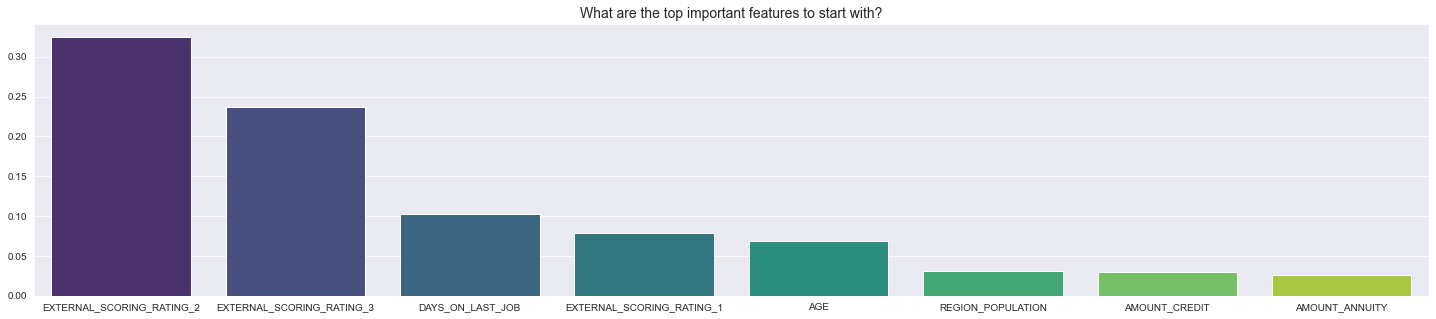

In [147]:
n_top = 8
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.columns

plt.figure(figsize=(25, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

**OBSERVATION**:
- It seems like most of the features are not very correlated with each other, linear algorithm might be not the best option
- TARGET features doesn't correlate a lot with other features either
- CHILDRENS and FAMILY_SIZE, AMOUNT_CREDIT and AMOUNT_ANNUITY, AGE and DAYS_ON_LAST_JOB have a hign correlation
- EXTERNAL_SCORING_RATING_2, EXTERNAL_SCORING_RATING_3 and DAYS_ON_LAST_JOB are the top 3 important features

## Data Cleaning

Remember, proper data cleaning can make or break your project. Better data > fancier algorithms. Review the Cornerstone Projects if you need a refresher on the code.

Unwanted Observations:
- Have you dropped duplicate observations?
- Have you dropped irrelevant observations?

Structural Errors:
- Are there any features that should be encoded as binary indicator variables?
- Have you fixed typos and inconsistent capitalization in your categorical features?
- Are there any classes in your categorical features that refer to the same thing? (e.g. “N/A” and “Not Applicable” appearing as two different classes)

Outliers
- Have you visually checked for any potential outliers to remove in your features?
- Do you have a good reason to remove each outlier? (e.g. suspicious measurements, different population, different application)

Missing Data
- Have you labeled missing values in categorical features?
- Have you flagged and filled missing values in numeric features?
- Tip: There are certain situations where dropping observations with missing values is appropriate, such as if you only care about predicting observations that
have a given feature value. For example, you might only wish to predict housing prices for single-family homes, in which case you would simply drop any
observations that weren’t for single-family homes (including those with missing values for property type).

## Baseline

## Feature Engineering

Feature engineering is one of the best ways data scientists can improve model performance and add value into the applied machine learning process.

Domain Knowledge:
- Do you have prior expertise in your chosen domain? If not, have you done sufficient reading / research / preparation to understand it better?
- Do you know anyone else in your network who also has domain expertise?
- Based on your knowledge of the domain, are there any features you could engineer that would potentially improve the performance of your model?

Heuristics:
- Are there any interaction features you could create?
- Are there any indicator features you could create?
- Have you grouped sparse classes in your categorical features?
- Do you need to do any form of data wrangling, such as aggregating data (i.e. rolling it up)?
- Are there any ordinal categorical features you could encode as numeric?
- Are there any potentially useful outside datasets you could merge in?

Preparing the ABT:
- Have you created dummy variables for your categorical features?
- Have you dropped unused and/or redundant features? (e.g. ID columns, features that wouldn’t be available, text descriptions and metadata, etc.)

## Algorithm Selection

For your Capstone Project, you’ve probably already imported the relevant algorithms at the start of the project, under the Library Imports section. Therefore, you should use this
section to explain your choices and showcase your understanding.
- Why did you choose those algorithms?
- What are their practical benefits?
- What are the key hyperparameters to tune for your chosen algorithms?

## Model Training

Once you’ve done the steps leading up to this one, model training should be straightforward and formulaic. Review the Cornerstone Projects if you need a refresher
on the code.

Data Spending:
- Have you split your dataset into separate training and test sets?
- Have you set a random seed for replicable results?
- Do you understand the purpose and use-case of cross-validation?

Pre-Processing & Pipelines:
- Have you set up your modeling pipelines with the proper preprocessing steps?
- Have you set random states for each algorithm to ensure replicable results?

Hyperparameter Tuning:
- Have you declared hyperparameter grids with reasonable hyperparameter values
- try for each of your algorithms?
- Have you set up GridSearchCV objects for each of your algorithms to perform cross-validation and tune hyperparameters?
- Have you fit models using each of your algorithms?

Winner Selection:
- Which of your models had the best cross-validated score?
- Which of your models performs the best on the test set?
- Were you able to satisfy your win-condition for this project?
- Do you need to use any additional performance metrics to evaluate your model?

## Insights & Analysis

Many people miss this crucial Insights & Analysis section. This comes at the end of your project, and it's really there to tie everything together. This is where you'd
summarize your results, discuss your most important findings, and even explain how you would expand upon your project if you had more time and resources.
- What were your key findings and results?
- What was your winning model (if applicable)?
- What did you personally learn by completing this project?
- How would you expand upon or improve this project if you had more time and/or resources?
- Are there any additional datasets that you would wish to acquire?
- Were there any useful references that helped you complete your project? If so, you should add citations at the bottom.